What if instead of trying faces etc etc we just 

found the center of the screen 

found the nearst number (contur)

found the nearst number to that number (conuturs again)

checked if they lined up if they did its a two diget number <br/>
---- lined up here means somthing need to be done by taking both conturs rotating each of them so that they have the thinist bounding box (that one of the dimensions is minimesed) if they both are rotated roughly the same amount to do this then they line up if it dosent work then it dosent

if they dont its a one digit number nad the one closest to the screen is the number

lazy but if it works thats a techincal working program

# step 0 take in the image
not going to be nessary in when this is moved over to main program

In [11]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui
import copy
debug = 1 #set to 1 to see each step set to 0 to run fast
cursed = 0

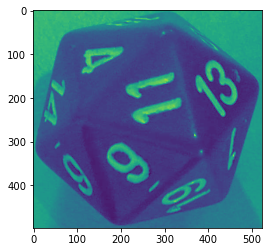

In [17]:
fileName = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
dieRaw = cv2.imread(fileName,cv2.IMREAD_COLOR)
dieRaw = cv2.cvtColor(dieRaw,cv2.COLOR_RGB2BGR)
dieGray = cv2.cvtColor(dieRaw,cv2.COLOR_BGR2GRAY)
if debug == 1:
    plt.imshow(dieGray)

# step 1 find the center of the screen

In [18]:
def displayCenterOfImage(image):#purely for debuing help
    h, w = image.shape
    midY, midX = h/2, w/2
    imageCopy = copy.deepcopy(image)
    imageCopy = cv2.cvtColor(imageCopy,cv2.COLOR_GRAY2BGR)
    cv2.circle(img = imageCopy,center = (int(midY), int(midX)),radius =5, color = (0,0,255), thickness = -1)
    plt.imshow(imageCopy)

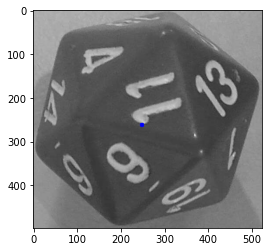

In [19]:
h, w = dieGray.shape
midY, midX = h/2, w/2
displayCenterOfImage(dieGray)

# step 2 find the two nearest conturs to the center

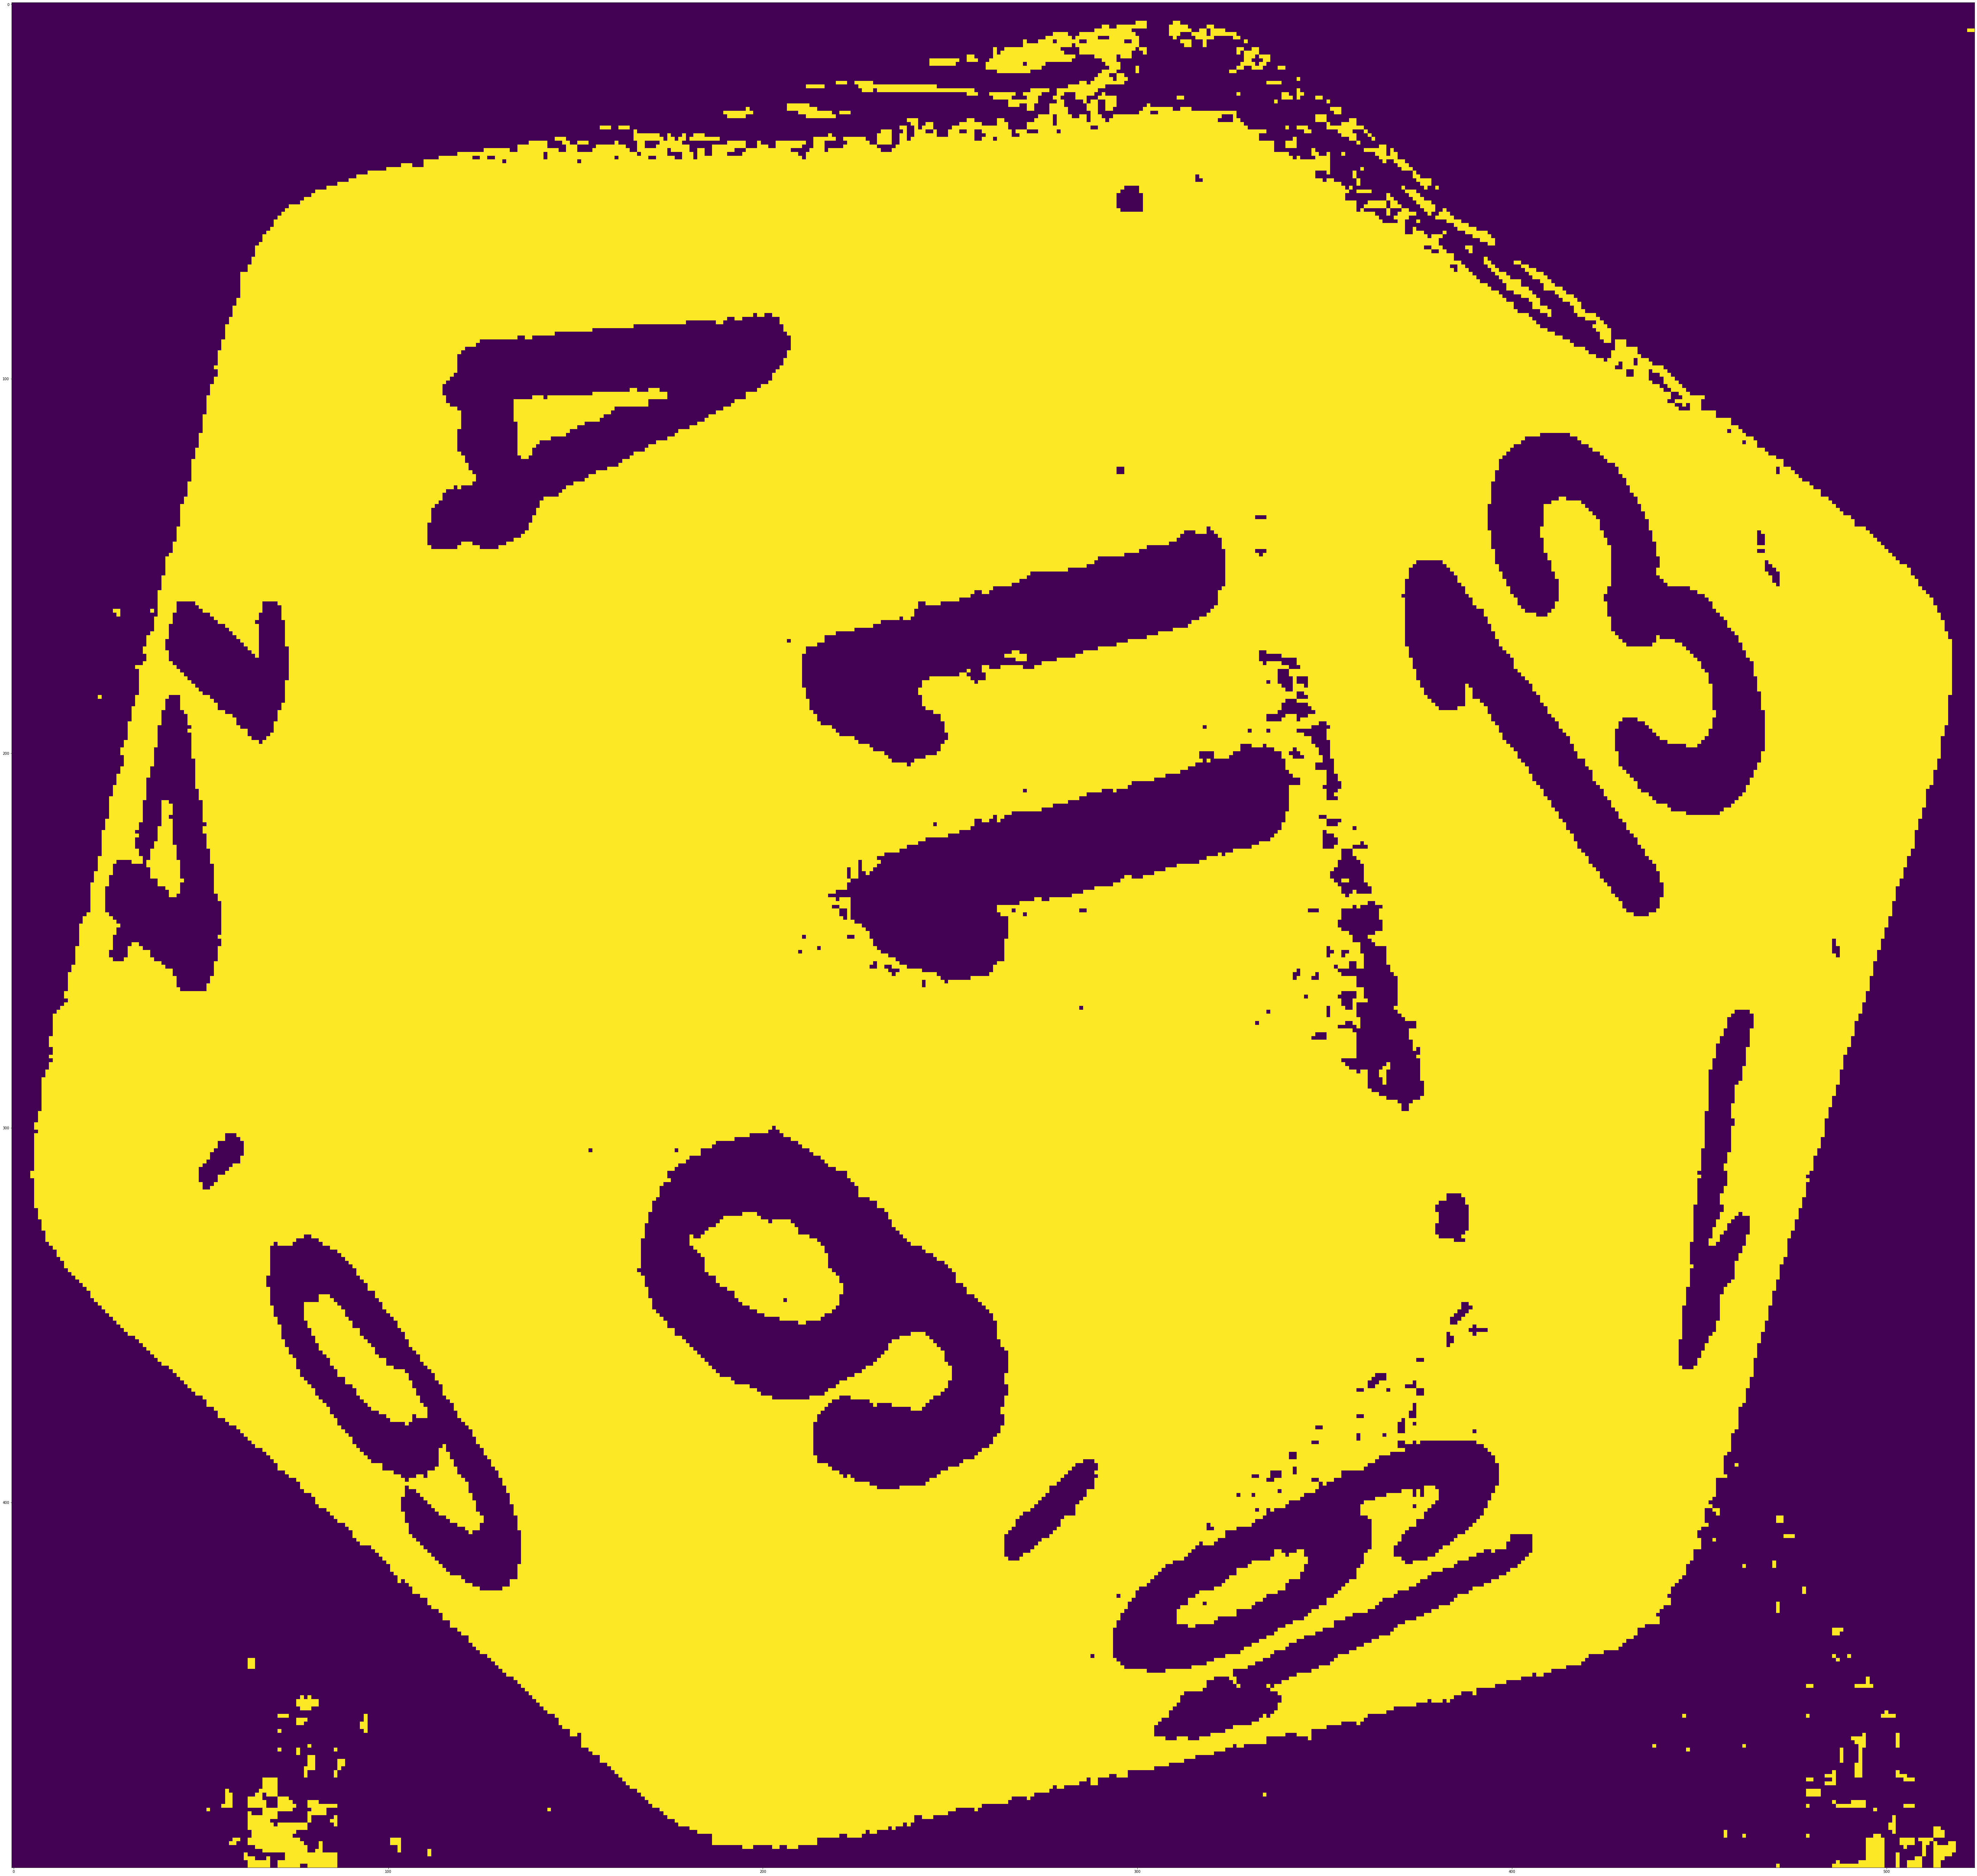

In [23]:
#MAGIC threshoulding stuff
thresholdConsant = (np.mean(dieGray) + np.std(dieGray))/25
threshholdedDieGray = cv2.adaptiveThreshold(dieGray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 501,thresholdConsant)
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(threshholdedDieGray)

 clean up

In [24]:
#MAGIC - how do we know what size the tiding up stuff should be?
circle4x4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
circle10x10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
circle3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
circle15x15 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))

diceMask = cv2.erode(threshholdedDieGray,circle4x4)
diceMask = cv2.dilate(diceMask,circle15x15)

if debug == 1:
    

# step 3 are they lined up?

In [ ]:
https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/